# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ

In [1]:
import pandas as pd

# Îç∞Ïù¥ÌÑ∞Î•º ÏùΩÏñ¥Î¥ÖÏãúÎã§. 
train_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_train.txt')
test_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_test.txt')

train_data.head()

id                                           document  label
0   9976970                                ÏïÑ ÎçîÎπô.. ÏßÑÏßú ÏßúÏ¶ùÎÇòÎÑ§Ïöî Î™©ÏÜåÎ¶¨      0
1   3819312                  Ìù†...Ìè¨Ïä§ÌÑ∞Î≥¥Í≥† Ï¥àÎî©ÏòÅÌôîÏ§Ñ....Ïò§Î≤ÑÏó∞Í∏∞Ï°∞Ï∞® Í∞ÄÎ≥çÏßÄ ÏïäÍµ¨ÎÇò      1
2  10265843                                  ÎÑàÎ¨¥Ïû¨Î∞ìÏóàÎã§Í∑∏ÎûòÏÑúÎ≥¥ÎäîÍ≤ÉÏùÑÏ∂îÏ≤úÌïúÎã§      0
3   9045019                      ÍµêÎèÑÏÜå Ïù¥ÏïºÍ∏∞Íµ¨Î®º ..ÏÜîÏßÅÌûà Ïû¨ÎØ∏Îäî ÏóÜÎã§..ÌèâÏ†ê Ï°∞Ï†ï      0
4   6483659  ÏÇ¨Ïù¥Î™¨ÌéòÍ∑∏Ïùò ÏùµÏÇ¥Ïä§Îü∞ Ïó∞Í∏∞Í∞Ä ÎèãÎ≥¥ÏòÄÎçò ÏòÅÌôî!Ïä§ÌååÏù¥ÎçîÎß®ÏóêÏÑú ÎäôÏñ¥Î≥¥Ïù¥Í∏∞Îßå ÌñàÎçò Ïª§Ïä§Ìã¥ ...      1

# Îç∞Ïù¥ÌÑ∞Î°úÎçî Íµ¨ÏÑ±

Îã§ÏùåÏùÑ ÏàòÌñâÌïòÍ≤åÎÅî
- Îç∞Ïù¥ÌÑ∞Ïùò Ï§ëÎ≥µ Ï†úÍ±∞
- NaN Í≤∞Ï∏°Ïπò Ï†úÍ±∞
- ÌïúÍµ≠Ïñ¥ ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÎ°ú ÌÜ†ÌÅ∞Ìôî
- Î∂àÏö©Ïñ¥(Stopwords) Ï†úÍ±∞
- ÏÇ¨Ï†Ñword_to_index Íµ¨ÏÑ±
- ÌÖçÏä§Ìä∏ Ïä§Ìä∏ÎßÅÏùÑ ÏÇ¨Ï†Ñ Ïù∏Îç±Ïä§ Ïä§Ìä∏ÎßÅÏúºÎ°ú Î≥ÄÌôò
- X_train, y_train, X_test, y_test, word_to_index Î¶¨ÌÑ¥

In [2]:
from konlpy.tag import Mecab
import numpy as np
from collections import Counter

tokenizer = Mecab()
stopwords = ['Ïùò','Í∞Ä','Ïù¥','ÏùÄ','Îì§','Îäî','Ï¢Ä','Ïûò','Í±ç','Í≥º','ÎèÑ','Î•º','ÏúºÎ°ú','Ïûê','Ïóê','ÏôÄ','Ìïú','ÌïòÎã§']

def load_data(train_data, test_data, num_words=10000):
    train_data.drop_duplicates(subset=['document'], inplace=True)
    train_data = train_data.dropna(how = 'any') 
    test_data.drop_duplicates(subset=['document'], inplace=True)
    test_data = test_data.dropna(how = 'any') 
    
    X_train = []
    for sentence in train_data['document']:
        temp_X = tokenizer.morphs(sentence) # ÌÜ†ÌÅ∞Ìôî
        temp_X = [word for word in temp_X if not word in stopwords] # Î∂àÏö©Ïñ¥ Ï†úÍ±∞
        X_train.append(temp_X)

    X_test = []
    for sentence in test_data['document']:
        temp_X = tokenizer.morphs(sentence) # ÌÜ†ÌÅ∞Ìôî
        temp_X = [word for word in temp_X if not word in stopwords] # Î∂àÏö©Ïñ¥ Ï†úÍ±∞
        X_test.append(temp_X)
    
    words = np.concatenate(X_train).tolist()
    counter = Counter(words)
    counter = counter.most_common(10000-4)
    vocab = ['', '', '', ''] + [key for key, _ in counter]
    word_to_index = {word:index for index, word in enumerate(vocab)}
        
    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index[''] for word in wordlist]
        
    X_train = list(map(wordlist_to_indexlist, X_train))
    X_test = list(map(wordlist_to_indexlist, X_test))
        
    return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index
    
X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data) 

In [3]:
word_to_index = {k:(v+1) for k,v in word_to_index.items()}

In [4]:
word_to_index["<PAD>"] = 0
word_to_index["<BOS>"] = 1
word_to_index["<UNK>"] = 2  # unknown
word_to_index["<UNUSED>"] = 3

In [5]:
index_to_word = {index:word for word, index in word_to_index.items()}

In [6]:
index_to_word

{4: '',
 5: '.',
 6: 'ÏòÅÌôî',
 7: 'Îã§',
 8: 'Í≥†',
 9: 'Ìïò',
 10: 'ÏùÑ',
 11: 'Î≥¥',
 12: '..',
 13: 'Í≤å',
 14: ',',
 15: '!',
 16: 'ÏßÄ',
 17: 'Ïûà',
 18: 'ÏóÜ',
 19: '?',
 20: 'Ï¢ã',
 21: 'ÎÇò',
 22: 'Ïóà',
 23: 'Îßå',
 24: 'ÎäîÎç∞',
 25: 'ÎÑàÎ¨¥',
 26: 'Î¥§',
 27: 'Ï†Å',
 28: 'Ïïà',
 29: 'Ï†ïÎßê',
 30: 'Î°ú',
 31: 'Ïùå',
 32: 'Í≤É',
 33: 'ÏïÑ',
 34: 'ÎÑ§Ïöî',
 35: 'Ïû¨Î∞å',
 36: 'Ïñ¥',
 37: 'Í∞ô',
 38: 'Ï†ê',
 39: 'ÏßÄÎßå',
 40: 'ÏßÑÏßú',
 41: 'Ìñà',
 42: 'ÏóêÏÑú',
 43: 'Í∏∞',
 44: 'ÎÑ§',
 45: 'Ïïä',
 46: 'Í±∞',
 47: 'Ïïò',
 48: 'Ïàò',
 49: 'Îêò',
 50: 'Î©¥',
 51: '„Öã„Öã',
 52: 'Îßê',
 53: 'Ïó∞Í∏∞',
 54: 'Ïù∏',
 55: 'Ï£º',
 56: 'ÎÇ¥',
 57: 'ÏµúÍ≥†',
 58: '~',
 59: 'ÌèâÏ†ê',
 60: 'Ïù¥Îü∞',
 61: 'Îçò',
 62: 'Ïñ¥Ïöî',
 63: 'Ìï†',
 64: 'Ïôú',
 65: 'Í≤†',
 66: '1',
 67: 'Ïä§ÌÜ†Î¶¨',
 68: 'Ìï¥',
 69: 'ÏäµÎãàÎã§',
 70: '„Öã„Öã„Öã',
 71: '...',
 72: 'ÎìúÎùºÎßà',
 73: 'ÏÉùÍ∞Å',
 74: 'ÏïÑÎãà',
 75: 'Îçî',
 76: 'Í∑∏',
 77: 'Ïã∂',
 78: 'ÏÇ¨Îûå',
 79: 'ÎìØ',
 80: 'Îïå',
 81: 'Í∞êÎèô',
 82: 

In [7]:
word_to_index

{'': 4,
 '.': 5,
 'ÏòÅÌôî': 6,
 'Îã§': 7,
 'Í≥†': 8,
 'Ìïò': 9,
 'ÏùÑ': 10,
 'Î≥¥': 11,
 '..': 12,
 'Í≤å': 13,
 ',': 14,
 '!': 15,
 'ÏßÄ': 16,
 'Ïûà': 17,
 'ÏóÜ': 18,
 '?': 19,
 'Ï¢ã': 20,
 'ÎÇò': 21,
 'Ïóà': 22,
 'Îßå': 23,
 'ÎäîÎç∞': 24,
 'ÎÑàÎ¨¥': 25,
 'Î¥§': 26,
 'Ï†Å': 27,
 'Ïïà': 28,
 'Ï†ïÎßê': 29,
 'Î°ú': 30,
 'Ïùå': 31,
 'Í≤É': 32,
 'ÏïÑ': 33,
 'ÎÑ§Ïöî': 34,
 'Ïû¨Î∞å': 35,
 'Ïñ¥': 36,
 'Í∞ô': 37,
 'Ï†ê': 38,
 'ÏßÄÎßå': 39,
 'ÏßÑÏßú': 40,
 'Ìñà': 41,
 'ÏóêÏÑú': 42,
 'Í∏∞': 43,
 'ÎÑ§': 44,
 'Ïïä': 45,
 'Í±∞': 46,
 'Ïïò': 47,
 'Ïàò': 48,
 'Îêò': 49,
 'Î©¥': 50,
 '„Öã„Öã': 51,
 'Îßê': 52,
 'Ïó∞Í∏∞': 53,
 'Ïù∏': 54,
 'Ï£º': 55,
 'ÎÇ¥': 56,
 'ÏµúÍ≥†': 57,
 '~': 58,
 'ÌèâÏ†ê': 59,
 'Ïù¥Îü∞': 60,
 'Îçò': 61,
 'Ïñ¥Ïöî': 62,
 'Ìï†': 63,
 'Ïôú': 64,
 'Í≤†': 65,
 '1': 66,
 'Ïä§ÌÜ†Î¶¨': 67,
 'Ìï¥': 68,
 'ÏäµÎãàÎã§': 69,
 '„Öã„Öã„Öã': 70,
 '...': 71,
 'ÎìúÎùºÎßà': 72,
 'ÏÉùÍ∞Å': 73,
 'ÏïÑÎãà': 74,
 'Îçî': 75,
 'Í∑∏': 76,
 'Ïã∂': 77,
 'ÏÇ¨Îûå': 78,
 'ÎìØ': 79,
 'Îïå': 80,
 'Í∞êÎèô': 81,
 'Ìï®

In [8]:
print(index_to_word[1])       # '<BOS>' 
print(word_to_index['ÏòÅÌôî'])   # 6
print(index_to_word[5])       # '.'

<BOS>
6
.


In [9]:
# Î¨∏Ïû• 1Í∞úÎ•º ÌôúÏö©Ìï† ÎîïÏÖîÎÑàÎ¶¨ÏôÄ Ìï®Íªò Ï£ºÎ©¥, Îã®Ïñ¥ Ïù∏Îç±Ïä§ Î¶¨Ïä§Ìä∏ Î≤°ÌÑ∞Î°ú Î≥ÄÌôòÌï¥ Ï£ºÎäî Ìï®ÏàòÏûÖÎãàÎã§. 
# Îã®, Î™®Îì† Î¨∏Ïû•ÏùÄ <BOS>Î°ú ÏãúÏûëÌïòÎäî Í≤ÉÏúºÎ°ú Ìï©ÎãàÎã§. 
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

# Ïó¨Îü¨ Í∞úÏùò Î¨∏Ïû• Î¶¨Ïä§Ìä∏Î•º ÌïúÍ∫ºÎ≤àÏóê Îã®Ïñ¥ Ïù∏Îç±Ïä§ Î¶¨Ïä§Ìä∏ Î≤°ÌÑ∞Î°ú encodeÌï¥ Ï£ºÎäî Ìï®ÏàòÏûÖÎãàÎã§. 
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# Ïà´Ïûê Î≤°ÌÑ∞Î°ú encodeÎêú Î¨∏Ïû•ÏùÑ ÏõêÎûòÎåÄÎ°ú decodeÌïòÎäî Ìï®ÏàòÏûÖÎãàÎã§. 
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]Î•º ÌÜµÌï¥ <BOS>Î•º Ï†úÏô∏

# Ïó¨Îü¨ Í∞úÏùò Ïà´Ïûê Î≤°ÌÑ∞Î°ú encodeÎêú Î¨∏Ïû•ÏùÑ ÌïúÍ∫ºÎ≤àÏóê ÏõêÎûòÎåÄÎ°ú decodeÌïòÎäî Ìï®ÏàòÏûÖÎãàÎã§. 
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

In [10]:
print(get_decoded_sentence(X_train[5555], index_to_word))
print('ÎùºÎ≤®: ', y_train[5555])  # 5555Î≤àÏß∏ Î¶¨Î∑∞Îç∞Ïù¥ÌÑ∞Ïùò ÎùºÎ≤®

Ïïû Ïò§Îûò ÎßåÎìú Ïù¥Í±¥ . Ïù∏Ï†ï Î∂ÄÌÑ∞ ÎÅå ÎäîÎç∞ Ïõê
ÎùºÎ≤®:  0


# Î™®Îç∏ Íµ¨ÏÑ±ÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù Î∞è Í∞ÄÍ≥µ

- Îç∞Ïù¥ÌÑ∞ÏÖã ÎÇ¥ Î¨∏Ïû• Í∏∏Ïù¥ Î∂ÑÌè¨
- Ï†ÅÏ†àÌïú ÏµúÎåÄ Î¨∏Ïû• Í∏∏Ïù¥ ÏßÄÏ†ï
- keras.preprocessing.sequence.pad_sequences ÏùÑ ÌôúÏö©Ìïú Ìå®Îî© Ï∂îÍ∞Ä

In [11]:
total_data_text = list(X_train) + list(X_test)
# ÌÖçÏä§Ìä∏Îç∞Ïù¥ÌÑ∞ Î¨∏Ïû•Í∏∏Ïù¥Ïùò Î¶¨Ïä§Ìä∏Î•º ÏÉùÏÑ±Ìïú ÌõÑ
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# Î¨∏Ïû•Í∏∏Ïù¥Ïùò ÌèâÍ∑†Í∞í, ÏµúÎåÄÍ∞í, ÌëúÏ§ÄÌé∏Ï∞®Î•º Í≥ÑÏÇ∞Ìï¥ Î≥∏Îã§. 
print('Î¨∏Ïû•Í∏∏Ïù¥ ÌèâÍ∑† : ', np.mean(num_tokens))
print('Î¨∏Ïû•Í∏∏Ïù¥ ÏµúÎåÄ : ', np.max(num_tokens))
print('Î¨∏Ïû•Í∏∏Ïù¥ ÌëúÏ§ÄÌé∏Ï∞® : ', np.std(num_tokens))

# ÏòàÎ•ºÎì§Ïñ¥, ÏµúÎåÄ Í∏∏Ïù¥Î•º (ÌèâÍ∑† + 2*ÌëúÏ§ÄÌé∏Ï∞®)Î°ú ÌïúÎã§Î©¥,  
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print('Ï†ÑÏ≤¥ Î¨∏Ïû•Ïùò {}%Í∞Ä maxlen ÏÑ§Ï†ïÍ∞í Ïù¥ÎÇ¥Ïóê Ìè¨Ìï®Îê©ÎãàÎã§. '.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))

Î¨∏Ïû•Í∏∏Ïù¥ ÌèâÍ∑† :  15.96940191154864
Î¨∏Ïû•Í∏∏Ïù¥ ÏµúÎåÄ :  116
Î¨∏Ïû•Í∏∏Ïù¥ ÌëúÏ§ÄÌé∏Ï∞® :  12.843571191092
pad_sequences maxlen :  41
Ï†ÑÏ≤¥ Î¨∏Ïû•Ïùò 0.9342988343341575%Í∞Ä maxlen ÏÑ§Ï†ïÍ∞í Ïù¥ÎÇ¥Ïóê Ìè¨Ìï®Îê©ÎãàÎã§. 


In [12]:
import numpy as np
import tensorflow as tf
import os

In [13]:
# RNNÏùÑ ÏúÑÌïú padding='pre'Îç∞Ïù¥ÌÑ∞

x_train_rnn = tf.keras.preprocessing.sequence.pad_sequences(X_train,
                                                        value=word_to_index["<PAD>"],
                                                        padding='pre',
                                                        maxlen=maxlen)

x_test_rnn = tf.keras.preprocessing.sequence.pad_sequences(X_test,
                                                       value=word_to_index["<PAD>"],
                                                       padding='pre',
                                                       maxlen=maxlen)

print(x_train_rnn.shape)

(146182, 41)


In [14]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(X_train,
                                                        value=word_to_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=maxlen)

x_test = tf.keras.preprocessing.sequence.pad_sequences(X_test,
                                                       value=word_to_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=maxlen)

print(x_train.shape)

(146182, 41)


# Î™®Îç∏Î≥Ñ ÏÑ±Îä• ÌèâÍ∞Ä

# 1. RNN

## Î™®Îç∏ Íµ¨ÏÑ± Î∞è validation set Íµ¨ÏÑ±

In [15]:
vocab_size = 10000    # Ïñ¥Ìúò ÏÇ¨Ï†ÑÏùò ÌÅ¨Í∏∞ÏûÖÎãàÎã§(10,000Í∞úÏùò Îã®Ïñ¥)
word_vector_dim = 10  # ÏõåÎìú Î≤°ÌÑ∞Ïùò Ï∞®Ïõê Ïàò (Î≥ÄÍ≤Ω Í∞ÄÎä•Ìïú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞)

# model_rnn ÏÑ§Í≥Ñ - Îî•Îü¨Îãù Î™®Îç∏ ÏΩîÎìúÎ•º ÏßÅÏ†ë ÏûëÏÑ±Ìï¥ Ï£ºÏÑ∏Ïöî.
model_rnn = tf.keras.Sequential()
model_rnn.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model_rnn.add(tf.keras.layers.GlobalMaxPooling1D())
model_rnn.add(tf.keras.layers.Dense(8, activation='relu'))
model_rnn.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_rnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 10)          100000    
_________________________________________________________________
global_max_pooling1d (Global (None, 10)                0         
_________________________________________________________________
dense (Dense)                (None, 8)                 88        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 100,097
Trainable params: 100,097
Non-trainable params: 0
_________________________________________________________________


In [16]:
# validation set 146182-100000=46182Í±¥ Î∂ÑÎ¶¨
x_val_rnn = x_train_rnn[100000:]   
y_val = y_train[100000:]

# validation setÏùÑ Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ 100000Í±¥
partial_x_train_rnn = x_train_rnn[:99999]  
partial_y_train = y_train[:99999]

print(partial_x_train_rnn.shape)
print(partial_y_train.shape)
print(x_val_rnn.shape, y_val.shape, )

(99999, 41)
(99999,)
(46182, 41) (46182,)


## Î™®Îç∏ ÌõàÎ†®, ÌÖåÏä§Ìä∏

In [17]:
model_rnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=3  # Î™á epochÎ•º ÌõàÎ†®ÌïòÎ©¥ Ï¢ãÏùÑÏßÄ Í≤∞Í≥ºÎ•º Î≥¥Î©¥ÏÑú Î∞îÍæ∏Ïñ¥ Î¥ÖÏãúÎã§. 

history_rnn = model_rnn.fit(partial_x_train_rnn,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val_rnn, y_val),
                    verbose=1)

Epoch 1/3
196/196 [==============================] - 2s 4ms/step - loss: 0.6381 - accuracy: 0.6536 - val_loss: 0.5594 - val_accuracy: 0.7753
Epoch 2/3
196/196 [==============================] - 1s 4ms/step - loss: 0.5054 - accuracy: 0.8156 - val_loss: 0.4829 - val_accuracy: 0.8224
Epoch 3/3
196/196 [==============================] - 1s 4ms/step - loss: 0.4405 - accuracy: 0.8497 - val_loss: 0.4504 - val_accuracy: 0.8314


In [18]:
results = model_rnn.evaluate(x_test_rnn,  y_test, verbose=2)

print(results)

1537/1537 - 2s - loss: 0.4502 - accuracy: 0.8301
[0.4502287805080414, 0.8300954103469849]


## Loss, Accuracy Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî

In [19]:
history_dict_rnn = history_rnn.history
print(history_dict_rnn.keys()) # epochÏóê Îî∞Î•∏ Í∑∏ÎûòÌîÑÎ•º Í∑∏Î†§Î≥º Ïàò ÏûàÎäî Ìï≠Î™©Îì§

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


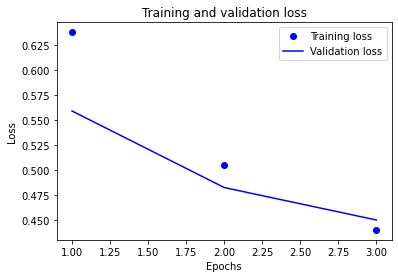

In [20]:
import matplotlib.pyplot as plt

acc = history_dict_rnn['accuracy']
val_acc = history_dict_rnn['val_accuracy']
loss = history_dict_rnn['loss']
val_loss = history_dict_rnn['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"Îäî "ÌååÎûÄÏÉâ Ï†ê"ÏûÖÎãàÎã§
plt.plot(epochs, loss, 'bo', label='Training loss')
# bÎäî "ÌååÎûÄ Ïã§ÏÑ†"ÏûÖÎãàÎã§
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

epochsÎ•º 3ÏúºÎ°ú Ìï¥Ïïº ÌïòÎäî Í≤ÉÏù∏Í∞Ä.......?

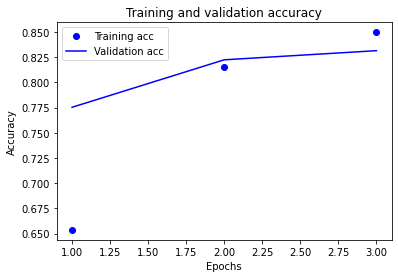

In [21]:
plt.clf()   # Í∑∏Î¶ºÏùÑ Ï¥àÍ∏∞ÌôîÌï©ÎãàÎã§

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## ÌïôÏäµÎêú Embedding Î†àÏù¥Ïñ¥ Î∂ÑÏÑù

In [22]:
embedding_layer = model_rnn.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)## ÌïôÏäµÎêú Embedding Î†àÏù¥Ïñ¥ Î∂ÑÏÑù

(10000, 10)


In [23]:
# ÌïôÏäµÌïú Embedding ÌååÎùºÎØ∏ÌÑ∞Î•º ÌååÏùºÏóê Ïç®ÏÑú Ï†ÄÏû•Ìï©ÎãàÎã§. 
word2vec_file_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/word2vec_rnn.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # Î™áÍ∞úÏùò Î≤°ÌÑ∞Î•º ÏñºÎßà ÏÇ¨Ïù¥Ï¶àÎ°ú Í∏∞Ïû¨Ìï†ÏßÄ ÌÉÄÏù¥ÌãÄÏùÑ ÏîÅÎãàÎã§.

# Îã®Ïñ¥ Í∞úÏàò(ÏóêÏÑú ÌäπÏàòÎ¨∏Ïûê 4Í∞úÎäî Ï†úÏô∏ÌïòÍ≥†)ÎßåÌÅºÏùò ÏõåÎìú Î≤°ÌÑ∞Î•º ÌååÏùºÏóê Í∏∞Î°ùÌï©ÎãàÎã§. 
vectors = model_rnn.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [25]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vector = word_vectors['ÏÇ¨Îûë']
vector

array([-0.06938047, -0.02158226,  0.03809017, -0.06615193, -0.08299857,
        0.077985  , -0.03644361, -0.0190595 ,  0.12643503, -0.04267322],
      dtype=float32)

In [26]:
word_vectors.similar_by_word("ÏÇ¨Îûë")

[('ÏòàÏà†', 0.9569724798202515),
 ('Îñ†ÎÇòÎ≥¥ÎÇ¥', 0.942481279373169),
 ('Ïù¥ÎûòÏÑú', 0.9195802211761475),
 ('Î∞©Ïãù', 0.9082784056663513),
 ('Ïä§ÎüΩ', 0.9046801328659058),
 ('ÎÇ®Í≤º', 0.9039919376373291),
 ('Ïò§Ïãπ', 0.9032516479492188),
 ('Ï∂©Ï°±', 0.8980161547660828),
 ('ÎÇ©Ïπò', 0.8951716423034668),
 ('ÏÑπÏä§', 0.8926260471343994)]

# 2. 1-d CNN

## Î™®Îç∏ Íµ¨ÏÑ± Î∞è validation set Íµ¨ÏÑ±

In [27]:
vocab_size = 10000    # Ïñ¥Ìúò ÏÇ¨Ï†ÑÏùò ÌÅ¨Í∏∞ÏûÖÎãàÎã§(10,000Í∞úÏùò Îã®Ïñ¥)
word_vector_dim = 10  # ÏõåÎìú Î≤°ÌÑ∞Ïùò Ï∞®Ïõê Ïàò (Î≥ÄÍ≤Ω Í∞ÄÎä•Ìïú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞)

model_1dcnn = tf.keras.Sequential()
model_1dcnn.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model_1dcnn.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model_1dcnn.add(tf.keras.layers.MaxPooling1D(5))
model_1dcnn.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model_1dcnn.add(tf.keras.layers.GlobalMaxPooling1D())
model_1dcnn.add(tf.keras.layers.Dense(8, activation='relu'))
model_1dcnn.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # ÏµúÏ¢Ö Ï∂úÎ†•ÏùÄ Í∏çÏ†ï/Î∂ÄÏ†ïÏùÑ ÎÇòÌÉÄÎÇ¥Îäî 1dim ÏûÖÎãàÎã§.

model_1dcnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 10)          100000    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 16)          1136      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 16)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 16)          1808      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [28]:
# validation set 146182-100000=46182Í±¥ Î∂ÑÎ¶¨
x_val = x_train[100000:]   
y_val = y_train[100000:]

# validation setÏùÑ Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ 100000Í±¥
partial_x_train = x_train[:99999]  
partial_y_train = y_train[:99999]

print(partial_x_train.shape)
print(partial_y_train.shape)
print(x_val.shape, y_val.shape, )

(99999, 41)
(99999,)
(46182, 41) (46182,)


## Î™®Îç∏ ÌõàÎ†®, ÌÖåÏä§Ìä∏

In [29]:
model_1dcnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=2  # Î™á epochÎ•º ÌõàÎ†®ÌïòÎ©¥ Ï¢ãÏùÑÏßÄ Í≤∞Í≥ºÎ•º Î≥¥Î©¥ÏÑú Î∞îÍæ∏Ïñ¥ Î¥ÖÏãúÎã§. 

history_1dcnn = model_1dcnn.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/2
196/196 [==============================] - 3s 6ms/step - loss: 0.5170 - accuracy: 0.7378 - val_loss: 0.3762 - val_accuracy: 0.8338
Epoch 2/2
196/196 [==============================] - 1s 5ms/step - loss: 0.3386 - accuracy: 0.8562 - val_loss: 0.3594 - val_accuracy: 0.8423


In [30]:
results = model_1dcnn.evaluate(x_test,  y_test, verbose=2)

print(results)

1537/1537 - 2s - loss: 0.3605 - accuracy: 0.8448
[0.3604620099067688, 0.8448033928871155]


## Loss, Accuracy Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî

In [31]:
history_dict_1dcnn = history_1dcnn.history
print(history_dict_1dcnn.keys()) # epochÏóê Îî∞Î•∏ Í∑∏ÎûòÌîÑÎ•º Í∑∏Î†§Î≥º Ïàò ÏûàÎäî Ìï≠Î™©Îì§

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


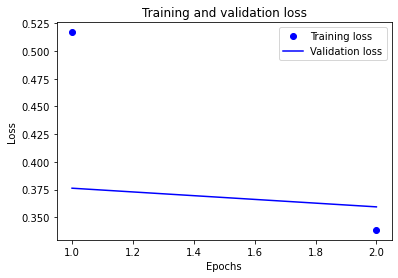

In [32]:
import matplotlib.pyplot as plt

acc = history_dict_1dcnn['accuracy']
val_acc = history_dict_1dcnn['val_accuracy']
loss = history_dict_1dcnn['loss']
val_loss = history_dict_1dcnn['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"Îäî "ÌååÎûÄÏÉâ Ï†ê"ÏûÖÎãàÎã§
plt.plot(epochs, loss, 'bo', label='Training loss')
# bÎäî "ÌååÎûÄ Ïã§ÏÑ†"ÏûÖÎãàÎã§
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

epochsÎ•º 2Î°ú Ìï¥Ïïº ÌïòÎäî Í≤ÉÏù∏Í∞Ä.......?

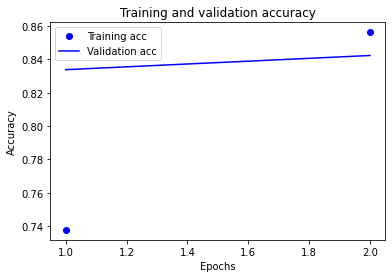

In [33]:
plt.clf()   # Í∑∏Î¶ºÏùÑ Ï¥àÍ∏∞ÌôîÌï©ÎãàÎã§

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## ÌïôÏäµÎêú Embedding Î†àÏù¥Ïñ¥ Î∂ÑÏÑù

In [34]:
embedding_layer = model_1dcnn.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)

(10000, 10)


In [35]:
# ÌïôÏäµÌïú Embedding ÌååÎùºÎØ∏ÌÑ∞Î•º ÌååÏùºÏóê Ïç®ÏÑú Ï†ÄÏû•Ìï©ÎãàÎã§. 
word2vec_file_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/word2vec_1dcnn.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # Î™áÍ∞úÏùò Î≤°ÌÑ∞Î•º ÏñºÎßà ÏÇ¨Ïù¥Ï¶àÎ°ú Í∏∞Ïû¨Ìï†ÏßÄ ÌÉÄÏù¥ÌãÄÏùÑ ÏîÅÎãàÎã§.

# Îã®Ïñ¥ Í∞úÏàò(ÏóêÏÑú ÌäπÏàòÎ¨∏Ïûê 4Í∞úÎäî Ï†úÏô∏ÌïòÍ≥†)ÎßåÌÅºÏùò ÏõåÎìú Î≤°ÌÑ∞Î•º ÌååÏùºÏóê Í∏∞Î°ùÌï©ÎãàÎã§. 
vectors = model_1dcnn.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [37]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vector = word_vectors['ÏÇ¨Îûë']
vector

array([ 0.01146026,  0.04153695,  0.0429845 , -0.10371677, -0.02377801,
        0.01862645, -0.04870476,  0.022397  ,  0.05827581,  0.00217716],
      dtype=float32)

In [38]:
word_vectors.similar_by_word("ÏÇ¨Îûë")

[('ÏàòÏàò', 0.937704861164093),
 ('Ìè¨Ïä§ÌÑ∞', 0.9275620579719543),
 ('ÎìúÎ¶¥', 0.9204841256141663),
 ('Î∞òÏ†Ñ', 0.9187310934066772),
 ('Î≥¥ÏÑ±', 0.9155116677284241),
 ('ÎîîÍ≤å', 0.9119260311126709),
 ('Ïù¥ÌÑ∞', 0.9081748127937317),
 ('ÏòÅÍµ¨', 0.9064736366271973),
 ('Ïó¨ÎèÑ', 0.9006767272949219),
 ('ÏπúÌïú', 0.9006608128547668)]

# 3. Global Max Pooling 1d

## Î™®Îç∏ Íµ¨ÏÑ± Î∞è validation set Íµ¨ÏÑ±

In [39]:
vocab_size = 10000    # Ïñ¥Ìúò ÏÇ¨Ï†ÑÏùò ÌÅ¨Í∏∞ÏûÖÎãàÎã§(10,000Í∞úÏùò Îã®Ïñ¥)
word_vector_dim = 10  # ÏõåÎìú Î≤°ÌÑ∞Ïùò Ï∞®Ïõê Ïàò (Î≥ÄÍ≤Ω Í∞ÄÎä•Ìïú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞)

model_gmp = tf.keras.Sequential()
model_gmp.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model_gmp.add(tf.keras.layers.GlobalMaxPooling1D())
model_gmp.add(tf.keras.layers.Dense(8, activation='relu'))
model_gmp.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # ÏµúÏ¢Ö Ï∂úÎ†•ÏùÄ Í∏çÏ†ï/Î∂ÄÏ†ïÏùÑ ÎÇòÌÉÄÎÇ¥Îäî 1dim ÏûÖÎãàÎã§.

model_gmp.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 10)          100000    
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 100,097
Trainable params: 100,097
Non-trainable params: 0
_________________________________________________________________


In [40]:
# validation set 146182-100000=46182Í±¥ Î∂ÑÎ¶¨
x_val = x_train[100000:]   
y_val = y_train[100000:]

# validation setÏùÑ Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ 100000Í±¥
partial_x_train = x_train[:99999]  
partial_y_train = y_train[:99999]

print(partial_x_train.shape)
print(partial_y_train.shape)
print(x_val.shape, y_val.shape, )

(99999, 41)
(99999,)
(46182, 41) (46182,)


## Î™®Îç∏ ÌõàÎ†®, ÌÖåÏä§Ìä∏

In [41]:
model_gmp.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=5  # Î™á epochÎ•º ÌõàÎ†®ÌïòÎ©¥ Ï¢ãÏùÑÏßÄ Í≤∞Í≥ºÎ•º Î≥¥Î©¥ÏÑú Î∞îÍæ∏Ïñ¥ Î¥ÖÏãúÎã§. 

history_gmp = model_gmp.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/5
196/196 [==============================] - 1s 4ms/step - loss: 0.6571 - accuracy: 0.7185 - val_loss: 0.5743 - val_accuracy: 0.7737
Epoch 2/5
196/196 [==============================] - 1s 4ms/step - loss: 0.4697 - accuracy: 0.8107 - val_loss: 0.4194 - val_accuracy: 0.8201
Epoch 3/5
196/196 [==============================] - 1s 4ms/step - loss: 0.3745 - accuracy: 0.8428 - val_loss: 0.3874 - val_accuracy: 0.8284
Epoch 4/5
196/196 [==============================] - 1s 4ms/step - loss: 0.3383 - accuracy: 0.8565 - val_loss: 0.3775 - val_accuracy: 0.8331
Epoch 5/5
196/196 [==============================] - 1s 4ms/step - loss: 0.3152 - accuracy: 0.8675 - val_loss: 0.3744 - val_accuracy: 0.8347


In [42]:
results = model_gmp.evaluate(x_test,  y_test, verbose=2)

print(results)

1537/1537 - 2s - loss: 0.3731 - accuracy: 0.8365
[0.37312382459640503, 0.8364831209182739]


## Loss, Accuracy Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî

In [43]:
history_dict_gmp = history_gmp.history
print(history_dict_gmp.keys()) # epochÏóê Îî∞Î•∏ Í∑∏ÎûòÌîÑÎ•º Í∑∏Î†§Î≥º Ïàò ÏûàÎäî Ìï≠Î™©Îì§

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


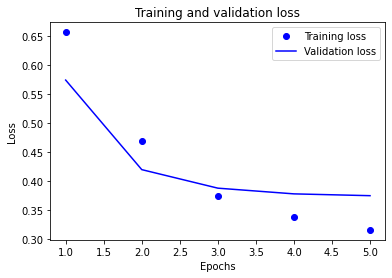

In [44]:
import matplotlib.pyplot as plt

acc = history_dict_gmp['accuracy']
val_acc = history_dict_gmp['val_accuracy']
loss = history_dict_gmp['loss']
val_loss = history_dict_gmp['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"Îäî "ÌååÎûÄÏÉâ Ï†ê"ÏûÖÎãàÎã§
plt.plot(epochs, loss, 'bo', label='Training loss')
# bÎäî "ÌååÎûÄ Ïã§ÏÑ†"ÏûÖÎãàÎã§
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

epochsÎ•º 5Î°ú Ìï¥Ïïº ÌïòÎäî Í≤ÉÏù∏Í∞Ä.......?

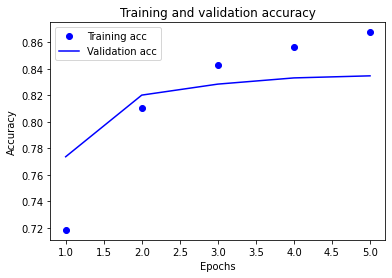

In [45]:
plt.clf()   # Í∑∏Î¶ºÏùÑ Ï¥àÍ∏∞ÌôîÌï©ÎãàÎã§

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## ÌïôÏäµÎêú Embedding Î†àÏù¥Ïñ¥ Î∂ÑÏÑù

In [47]:
embedding_layer = model_gmp.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)

(10000, 10)


In [48]:
# ÌïôÏäµÌïú Embedding ÌååÎùºÎØ∏ÌÑ∞Î•º ÌååÏùºÏóê Ïç®ÏÑú Ï†ÄÏû•Ìï©ÎãàÎã§. 
word2vec_file_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/word2vec_gmp.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # Î™áÍ∞úÏùò Î≤°ÌÑ∞Î•º ÏñºÎßà ÏÇ¨Ïù¥Ï¶àÎ°ú Í∏∞Ïû¨Ìï†ÏßÄ ÌÉÄÏù¥ÌãÄÏùÑ ÏîÅÎãàÎã§.

# Îã®Ïñ¥ Í∞úÏàò(ÏóêÏÑú ÌäπÏàòÎ¨∏Ïûê 4Í∞úÎäî Ï†úÏô∏ÌïòÍ≥†)ÎßåÌÅºÏùò ÏõåÎìú Î≤°ÌÑ∞Î•º ÌååÏùºÏóê Í∏∞Î°ùÌï©ÎãàÎã§. 
vectors = model_gmp.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [50]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vector = word_vectors['ÏÇ¨Îûë']
vector

array([-0.06146161, -0.03468858, -0.04084171,  0.23339441, -0.06433972,
       -0.14807364, -0.05531995, -0.13139845, -0.0011717 , -0.0350836 ],
      dtype=float32)

In [51]:
word_vectors.similar_by_word("ÏÇ¨Îûë")

[('Ï≤≠ÎÖÑ', 0.9541645050048828),
 ('ÎçîÎü¨Ïõå', 0.9531354904174805),
 ('ÎèôÏÑ±Ïï†', 0.9524900317192078),
 ('Ìô©Îãπ', 0.9523964524269104),
 ('Îã§Ï£†', 0.9477306008338928),
 ('Ïö∏Ìä∏Îùº', 0.945654571056366),
 ('ÏïÑÎ¨¥Í≤É', 0.9451218247413635),
 ('Ïãù', 0.9424355626106262),
 ('Ï£ºÎ≥ÄÏù∏', 0.9346771240234375),
 ('ÏõÉÍ∏∏Î†§Í≥†', 0.9327155351638794)]

# 4. ÌïúÍµ≠Ïñ¥ Word2Vec ÏûÑÎ≤†Îî© ÌôúÏö©ÌïòÏó¨ ÏÑ±Îä• Í∞úÏÑ†

In [ ]:
#!pip install --upgrade gensim==3.8.3

In [52]:
import gensim
print(gensim.__version__)

3.8.3


In [53]:
import os
from gensim.models import KeyedVectors
from gensim.models import Word2Vec

word2vec_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/ko.bin'
word2vec = Word2Vec.load(word2vec_path)
vector = word2vec['ÏÇ¨Îûë']
vector     # Î¨¥Î†§ 300dimÏùò ÏõåÎìú Î≤°ÌÑ∞ÏûÖÎãàÎã§.

/tmp/ipykernel_563/2332792890.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vector = word2vec['ÏÇ¨Îûë']


array([-1.3740246 , -1.7353463 ,  3.3915305 , -2.569253  , -1.4016607 ,
        1.4556127 ,  0.9414557 ,  1.9207907 ,  0.16471806,  0.4838317 ,
       -0.8547181 ,  2.0879807 ,  0.86741775,  0.87539405, -0.09962013,
        0.22928311, -1.1858722 ,  0.00858838,  1.4999928 , -0.16196461,
       -0.35184434, -0.92390764,  1.0849575 ,  0.3025011 ,  2.7021565 ,
       -1.0263684 ,  0.32864776, -0.76589465, -2.510981  , -0.66225356,
        2.8434615 ,  0.50130975, -1.021874  , -1.4366034 ,  1.1110784 ,
        0.5812605 , -0.5830406 , -0.5785423 ,  1.3634988 ,  2.3074338 ,
       -1.4314893 ,  0.45745876,  1.1073523 , -3.2135262 , -0.2898375 ,
       -1.1622221 ,  1.2369208 , -0.7622987 , -0.37757635,  1.1376442 ,
        0.01065568, -0.69105595,  1.5159112 ,  1.1534518 , -1.0119992 ,
       -0.5757404 ,  1.1349088 , -1.1289831 ,  0.13004152,  2.0451715 ,
       -0.23940353,  1.3604902 ,  0.72700524,  0.32545742,  1.0612459 ,
        0.42252553,  1.1442151 ,  2.8774905 ,  2.4377263 , -1.34

In [54]:
# Î©îÎ™®Î¶¨Î•º Îã§ÏÜå ÎßéÏù¥ ÏÜåÎπÑÌïòÎäî ÏûëÏóÖÏù¥Îãà Ïú†ÏùòÌï¥ Ï£ºÏÑ∏Ïöî.
word2vec.similar_by_word("ÏÇ¨Îûë")

/tmp/ipykernel_563/1098788216.py:2: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  word2vec.similar_by_word("ÏÇ¨Îûë")


[('Ïä¨Ìîî', 0.7216662764549255),
 ('ÌñâÎ≥µ', 0.6759077310562134),
 ('Ï†àÎßù', 0.6468985080718994),
 ('Í∏∞ÏÅ®', 0.6458414196968079),
 ('Ïù¥Î≥Ñ', 0.6334798336029053),
 ('Ï∂îÏñµ', 0.6320937275886536),
 ('Ïù∏ÏÉù', 0.6216273307800293),
 ('Ïï†Ï†ï', 0.6206069588661194),
 ('Ïó∞Ïù∏', 0.6186063289642334),
 ('Ïú†Ìòπ', 0.5965287685394287)]

In [55]:
vocab_size = 10000    # Ïñ¥Ìúò ÏÇ¨Ï†ÑÏùò ÌÅ¨Í∏∞ÏûÖÎãàÎã§(10,000Í∞úÏùò Îã®Ïñ¥)
word_vector_dim = 200  # ÏõåÎìú Î≤°ÌÑ∞Ïùò Ï∞®ÏõêÏàò
embedding_matrix = np.random.rand(vocab_size, word_vector_dim)

# embedding_matrixÏóê Word2Vec ÏõåÎìú Î≤°ÌÑ∞Î•º Îã®Ïñ¥ ÌïòÎÇòÏî©ÎßàÎã§ Ï∞®Î°ÄÏ∞®Î°Ä Ïπ¥ÌîºÌïúÎã§.
for i in range(4,vocab_size):
    if index_to_word[i] in word2vec:
        embedding_matrix[i] = word2vec[index_to_word[i]]

/tmp/ipykernel_563/1730871920.py:7: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  if index_to_word[i] in word2vec:
/tmp/ipykernel_563/1730871920.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  embedding_matrix[i] = word2vec[index_to_word[i]]


In [56]:
from tensorflow.keras.initializers import Constant

vocab_size = 10000    # Ïñ¥Ìúò ÏÇ¨Ï†ÑÏùò ÌÅ¨Í∏∞ÏûÖÎãàÎã§(10,000Í∞úÏùò Îã®Ïñ¥)
word_vector_dim = 200  # ÏõåÎìú Î≤°ÌÑ∞Ïùò Ï∞®Ïõê Ïàò 

# Î™®Îç∏ Íµ¨ÏÑ±
model_w2v = tf.keras.Sequential()
model_w2v.add(tf.keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 embeddings_initializer=Constant(embedding_matrix),  # Ïπ¥ÌîºÌïú ÏûÑÎ≤†Îî©ÏùÑ Ïó¨Í∏∞ÏÑú ÌôúÏö©
                                 input_length=maxlen, 
                                 trainable=True))   # trainableÏùÑ TrueÎ°ú Ï£ºÎ©¥ Fine-tuning
model_w2v.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model_w2v.add(tf.keras.layers.MaxPooling1D(5))
model_w2v.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model_w2v.add(tf.keras.layers.GlobalMaxPooling1D())
model_w2v.add(tf.keras.layers.Dense(8, activation='relu'))
model_w2v.add(tf.keras.layers.Dense(1, activation='sigmoid')) 

model_w2v.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 41, 200)           2000000   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 35, 16)            22416     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 7, 16)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1, 16)             1808      
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [57]:
# ÌïôÏäµÏùò ÏßÑÌñâ
model_w2v.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=3  # Î™á epochÎ•º ÌõàÎ†®ÌïòÎ©¥ Ï¢ãÏùÑÏßÄ Í≤∞Í≥ºÎ•º Î≥¥Î©¥ÏÑú Î∞îÍæ∏Ïñ¥ Î¥ÖÏãúÎã§. 

history_w2v = model_w2v.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/3
196/196 [==============================] - 3s 8ms/step - loss: 0.5672 - accuracy: 0.6930 - val_loss: 0.4728 - val_accuracy: 0.7743
Epoch 2/3
196/196 [==============================] - 1s 7ms/step - loss: 0.4052 - accuracy: 0.8158 - val_loss: 0.3992 - val_accuracy: 0.8188
Epoch 3/3
196/196 [==============================] - 1s 7ms/step - loss: 0.3388 - accuracy: 0.8535 - val_loss: 0.3813 - val_accuracy: 0.8312


In [58]:
# ÌÖåÏä§Ìä∏ÏÖãÏùÑ ÌÜµÌïú Î™®Îç∏ ÌèâÍ∞Ä
results = model_w2v.evaluate(x_test,  y_test, verbose=2)

print(results)

1537/1537 - 3s - loss: 0.3827 - accuracy: 0.8320
[0.3827216327190399, 0.8320279717445374]


## Loss, Accuracy Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî

In [59]:
history_dict_w2v = history_w2v.history
print(history_dict_w2v.keys()) # epochÏóê Îî∞Î•∏ Í∑∏ÎûòÌîÑÎ•º Í∑∏Î†§Î≥º Ïàò ÏûàÎäî Ìï≠Î™©Îì§

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


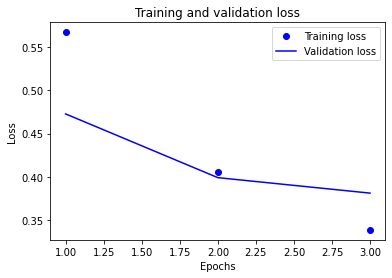

In [60]:
import matplotlib.pyplot as plt

acc = history_dict_w2v['accuracy']
val_acc = history_dict_w2v['val_accuracy']
loss = history_dict_w2v['loss']
val_loss = history_dict_w2v['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"Îäî "ÌååÎûÄÏÉâ Ï†ê"ÏûÖÎãàÎã§
plt.plot(epochs, loss, 'bo', label='Training loss')
# bÎäî "ÌååÎûÄ Ïã§ÏÑ†"ÏûÖÎãàÎã§
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

epochsÎ•º 3ÏúºÎ°ú Ìï¥Ïïº ÌïòÎäî Í≤ÉÏù∏Í∞Ä.......?

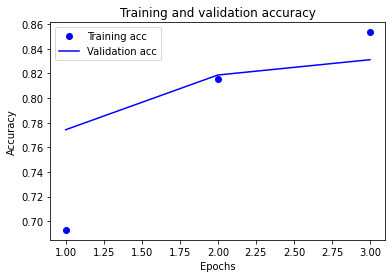

In [61]:
plt.clf()   # Í∑∏Î¶ºÏùÑ Ï¥àÍ∏∞ÌôîÌï©ÎãàÎã§

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# ÌöåÍ≥†

#### ÏÇ¨Ïö© Î™®Îç∏ 
RNN, 1dCNN, Global Max PoolingÏùÑ ÏÇ¨Ïö©Ìï¥ Î≥∏ Í≤∞Í≥º ÌÖåÏä§Ìä∏ Ïñ¥ÌÅêÎü¨ÏãúÍ∞Ä 0.83~0.84Ï†ïÎèÑÎ°ú ÎÇòÏôîÏùå.
Í∑∏Îü∞Îç∞ gensimÏùò Ïú†ÏÇ¨Îã®Ïñ¥ Ï∞æÍ∏∞Î•º ÌôúÏö©Ìï¥Î≥¥ÏïòÏùÑ Îïå, Î™®Îëê 'ÏÇ¨Îûë'Ïù¥ÎùºÎäî Îã®Ïñ¥Î°ú ÌÖåÏä§Ìä∏ Ìï¥ Î≥¥ÏïòÎäîÎç∞ Ï†ÑÌòÄ Îú¨Í∏àÏóÜÎäî Îã®Ïñ¥Îì§Ïù¥ ÎÇòÏò§Í∏∞ÎèÑ Ìï®..
ÏÇ¨Ï†ÑÌïôÏäµÎêú w2v ÏûÑÎ≤†Îî©ÏóêÏÑúÎäî ÎòëÍ∞ôÏù¥ 'ÏÇ¨Îûë'ÏúºÎ°ú Ïú†ÏÇ¨Îã®Ïñ¥ Ï∞æÍ∏∞Î•º Ìï¥ Î¥§ÏùÑ Îïå ÍΩ§ÎÇò ÎπÑÏä∑Ìïú Îã®Ïñ¥Îì§Ïù¥ ÎÇòÏôÄÏÑú Ï¢ãÏùÄ Í≤∞Í≥ºÎ•º Í∏∞ÎåÄÌñàÎäîÎç∞
ÏµúÏ¢Ö ÌÖåÏä§Ìä∏ Ïñ¥ÌÅêÎü¨ÏãúÎäî 0.83ÏúºÎ°ú ÎπÑÏä∑ÌñàÏùå..

#### # of epochs
ÏóêÌè¨ÌÅ¨Î•º Ï≤òÏùåÏóê ÎîîÌè¥Ìä∏Î°ú Î™®Îëê 20ÏúºÎ°ú Ï£ºÍ≥† ÏãúÏûëÌñàÏóàÎäîÎç∞, Î™®Îì† Î™®Îç∏Îì§ÏóêÏÑú 5Ï†ïÎèÑÍ∞Ä ÎÑòÏñ¥Í∞ÄÎ©¥ validation accuracyÍ∞Ä Í∏âÍ∞êÌïòÎäî Ï∂îÏÑ∏Î•º Î≥¥ÏòÄÏùå..
Í∑∏ÎûòÏÑú Í≤∞Íµ≠ Î™®Îì† Î™®Îç∏ÏóêÏÑú ÏóêÌè¨ÌÅ¨Î•º 2~5Î≤àÎßå ÎèåÎ¶¨Í≤å Îê®.

#### Í∞êÏÑ±Î∂ÑÏÑù
Í∞êÏÑ±Î∂ÑÏÑùÏùÄ Ïù¥ÎØ∏ÏßÄÎ∂ÑÏÑùÍ≥º Ï¢Ä Îã§Î•¥Í≤å ÎààÏóê ÏßÅÍ¥ÄÏ†ÅÏúºÎ°ú Î≥¥Ïù¥Îäî Í≤å ÏóÜÏñ¥ÏÑú Ï¢Ä Îçî Ïñ¥Î†µÍ≤å ÎäêÍª¥ÏßÄÎäî Í≤É Í∞ôÏùå. Ïñ¥Îñ§ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º Ï°∞Ï†ïÌï¥Ïïº ÏÑ±Îä•ÏùÑ ÎÜíÏùº Ïàò ÏûàÎäîÏßÄ ÏïåÍ≤å ÎêòÎ†§Î©¥ Í≥µÎ∂ÄÎ•º Îçî ÎßéÏù¥ Ìï¥ÏïºÌï† Í≤É Í∞ôÏùå üò≠üò≠üò≠üò≠üò≠üò≠